In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd

## API Bağlantısının Yapılması

In [3]:
import tweepy,codecs

In [4]:
# keys

In [5]:
consumer_key = 'GoZTyDDaHOQ1YreBZViTyDFTE'
consumer_secret = 'YxUt3pGFfkmCHz6Mbo77dLhPA1dCPilyDQXpXg8bz0e97Ssp7B'
access_token = '967443566648872961-Q8gso7kaTOF2fD9Lm9INadLKF2qCH9B'
access_token_secret = 'QYKILttsvXVqg9aerSGuTJGiCbk6AVLMJKnZJEd80qTaZ'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

#### Tweets Fetch

In [20]:
tweets = api.search(q='#monday',
                    lang='en',
                    result_type = 'recent',
                    count=1000)

In [21]:
# to df

In [22]:
def tweets_to_df(results):
    data = [[tw.id,
           tw.text,
           tw.created_at,
           tw.retweet_count,
           tw.source,
           tw.author.screen_name,
           tw.author.followers_count,
           tw.author.location,
           tw.entities.get('hashtags')] for tw in results]
    
    columns = ['id','text','created_at','retweet_count','source','user_screen_name','user_followers_count','user_location','Hashtags']
    
    return pd.DataFrame(data,columns=columns)

## Twitter Text Mining

In [23]:
df = tweets_to_df(tweets)

#### Text Processing

In [24]:
# buyuk-kucuk donusumu

In [25]:
df['text'] = df['text'].apply(lambda x : x.lower())

In [26]:
# noktalama işaretleri silimi

In [27]:
df['text'] = df['text'].str.replace('[^\w\s]','')

In [28]:
# sayılar

In [29]:
df['text'] = df['text'].str.replace('\d','')

In [30]:
# stopwords

In [31]:
import nltk
from nltk.corpus import stopwords

In [32]:
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x : ' '.join(w for w in x.split() if w not in sw)) 

In [33]:
# lemmi

In [36]:
from textblob import Word

In [37]:
df['text'] = df['text'].apply(lambda x : ' '.join([Word(w).lemmatize() for w in x.split()]))

In [38]:
# rt silimi

In [39]:
df['text'] = df['text'].str.replace('rt','')

#### word frequency

In [65]:
word_freq = pd.Series(df['text'].str.split().sum(axis=0)).value_counts().reset_index()

In [69]:
freq_df = pd.DataFrame(word_freq)

In [70]:
freq_df.columns = ['kelimeler','frekanslar']

In [73]:
freq_df.head()

,kelimeler,frekanslar
0,monday,61
1,horror,23
2,thenecronomi,23
3,podcast,23
4,film,23


In [74]:
# barplot

In [76]:
bar_reduced =  freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std() ]

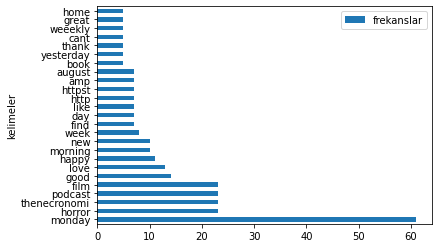

In [79]:
bar_reduced.plot.barh(x='kelimeler',y='frekanslar');

#### WordCloud

In [82]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt

In [83]:
# bütün texti topla

In [84]:
text = ' '.join(s for s in df.text)

In [85]:
# wordcloud

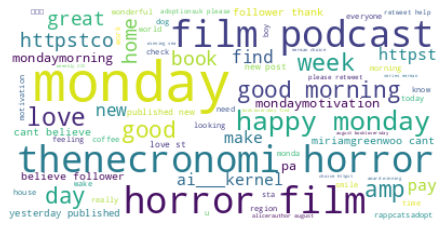

In [86]:
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

## Twitter Sentiment Analizi
yapacağımız iş verilen metinlerdeki sentiment skorlarını hesaplamaktır... <br>

Bizim burada kullanacağımız yöntem TextBlob algoritması olacak... Bu Algoritma Ingilizce cümlelerdeki olumsuzlukarı yakalar... <br>

Siz isterseniz kendi alanınıza özgün bir kelime kümesi oluşturarak koşullu işlemlerde de bu sentiment skorunu oluşturabilirsiniz..

In [88]:
from textblob import TextBlob

In [94]:
def sentiment_generator(df):
    
    text = df.text
    
    df['sentiment_score'] = 0
    df['emotion_class'] = ''
    
    
    for i in range(df.shape[0]):
        
        textB = TextBlob(text[i])
        # sentiment score
        sentiment_score = textB.sentiment.polarity
        
        df['sentiment_score'].iloc[i] = sentiment_score
        if sentiment_score < 0.00:
            duygu_sinifi = 'Negative'
            df['emotion_class'].iloc[i] = duygu_sinifi
        
        elif sentiment_score > 0.00:
            duygu_sinifi = 'Positive'
            df['emotion_class'].iloc[i] = duygu_sinifi
            
            
        else:
            duygu_sinifi = 'Notr'
            df['emotion_class'].iloc[i] = duygu_sinifi
            
    return df


In [95]:
df.head()

,id,text,created_at,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags
0,1424728285376925696,great day love forevory forevories memorial me...,2021-08-09 13:44:28,0,Crowdfire App,Forevory_,25,,"[{'text': 'forevory', 'indices': [37, 46]}, {'..."
1,1424728267198763009,adoptionsuk please retweet help moana find ho...,2021-08-09 13:44:23,132,Twitter for Android,sammonks3,462,"South West, England","[{'text': 'Bridgend', 'indices': [58, 67]}, {'..."
2,1424728256046043140,adoptionsuk please retweet help alfie find ho...,2021-08-09 13:44:21,194,Twitter for iPhone,cjlanecoach,2000,,"[{'text': 'ROTHERHAM', 'indices': [58, 68]}, {..."
3,1424728254930358279,congratulation july petofthemonth winner stanl...,2021-08-09 13:44:20,0,Sprout Social,petprotect,778,,"[{'text': 'petofthemonth', 'indices': [28, 42]..."
4,1424728223934558213,happy monday httpstcotrvzomd,2021-08-09 13:44:13,0,Twitter for iPhone,southoldshindig,68,"Southold, NY","[{'text': 'monday', 'indices': [6, 13]}]"


In [97]:
sentiment_generator(df)

,id,text,created_at,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1424728285376925696,great day love forevory forevories memorial me...,2021-08-09 13:44:28,0,Crowdfire App,Forevory_,25,,"[{'text': 'forevory', 'indices': [37, 46]}, {'...",0.650000,Positive
1,1424728267198763009,adoptionsuk please retweet help moana find ho...,2021-08-09 13:44:23,132,Twitter for Android,sammonks3,462,"South West, England","[{'text': 'Bridgend', 'indices': [58, 67]}, {'...",0.500000,Positive
2,1424728256046043140,adoptionsuk please retweet help alfie find ho...,2021-08-09 13:44:21,194,Twitter for iPhone,cjlanecoach,2000,,"[{'text': 'ROTHERHAM', 'indices': [58, 68]}, {...",0.133333,Positive
3,1424728254930358279,congratulation july petofthemonth winner stanl...,2021-08-09 13:44:20,0,Sprout Social,petprotect,778,,"[{'text': 'petofthemonth', 'indices': [28, 42]...",0.000000,Notr
4,1424728223934558213,happy monday httpstcotrvzomd,2021-08-09 13:44:13,0,Twitter for iPhone,southoldshindig,68,"Southold, NY","[{'text': 'monday', 'indices': [6, 13]}]",0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
95,1424724981917782018,majorgeeks ive side conversation monday monda...,2021-08-09 13:31:20,2,Twitter for Android,nobleinfantry,49,"LB, Ca","[{'text': 'monday', 'indices': [63, 70]}, {'te...",0.000000,Notr
96,1424724950561300482,ever déjà vu mr lancaster dont think could che...,2021-08-09 13:31:12,0,IFTTT,thebravestjulia,220,"Louisville, KY","[{'text': 'Monday', 'indices': [101, 108]}, {'...",0.000000,Notr
97,1424724935952437256,really trying push today struggle real hows ev...,2021-08-09 13:31:09,0,Twitter Web App,Glambymoi,1046,Global,"[{'text': 'monday', 'indices': [88, 95]}, {'te...",0.200000,Positive
98,1424724924371849222,mondaytwt weeekly identified monday chorus pa...,2021-08-09 13:31:06,9,Twitter for iPhone,handaysroom,376,,"[{'text': 'Weeekly', 'indices': [87, 95]}, {'t...",0.000000,Notr


In [98]:
# sınıfların üye sayıları

In [100]:
emotion_freq = df.groupby('emotion_class').count()['id']

In [101]:
emotion_freq

emotion_class
Negative     7
Notr        40
Positive    53
Name: id, dtype: int64

<AxesSubplot:ylabel='emotion_class'>

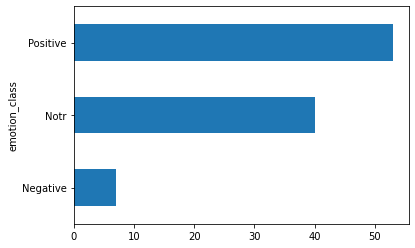

In [102]:
emotion_freq.plot.barh(y='emotion_class',x = 'id')

### Markalar üzerinden hesaplamalar

In [104]:
tweets = api.search(q='#apple',lang='en',count=1000)

In [105]:
df = tweets_to_df(tweets)

#### Text Processing

In [106]:
# buyuk-kucuk donusumu

In [107]:
df['text'] = df['text'].apply(lambda x : x.lower())

In [108]:
# noktalama işaretleri silimi

In [109]:
df['text'] = df['text'].str.replace('[^\w\s]','')

In [110]:
# sayılar

In [111]:
df['text'] = df['text'].str.replace('\d','')

In [112]:
# stopwords

In [113]:
import nltk
from nltk.corpus import stopwords

In [114]:
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x : ' '.join(w for w in x.split() if w not in sw)) 

In [115]:
# lemmi

In [116]:
from textblob import Word

In [117]:
df['text'] = df['text'].apply(lambda x : ' '.join([Word(w).lemmatize() for w in x.split()]))

In [118]:
# rt silimi

In [119]:
df['text'] = df['text'].str.replace('rt','')

In [120]:
# sentiment skorlaması

In [121]:
df = sentiment_generator(df)

In [122]:
emotion_freq = df.groupby('emotion_class').count()['id']

In [123]:
emotion_freq

emotion_class
Negative    13
Notr        48
Positive    39
Name: id, dtype: int64

<AxesSubplot:ylabel='emotion_class'>

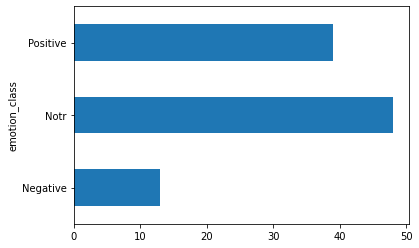

In [124]:
emotion_freq.plot.barh(y='emotion_class',x = 'id');